<h1>Predicting Credit Card Fraud</h1>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [53]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [55]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<p>The data above is not balanced suggesting there are unequal number of fraudulent transactions and non-fraudulent ones. The fraudulent transactions are represented as 1 in Class feature, and non-fraudulent transactions are represented as 0. We can also show the distribution using a histoplot below:</p>

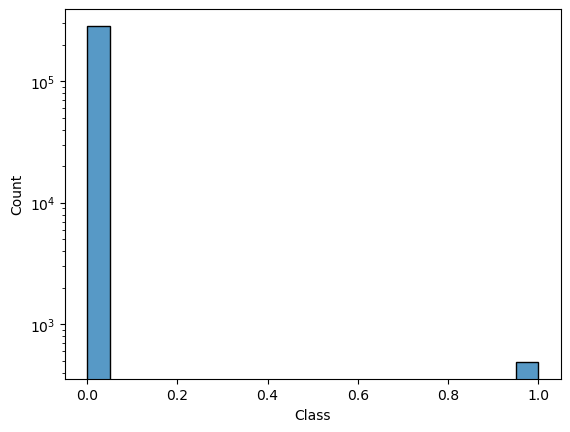

In [56]:
sns.histplot(df['Class'])
plt.yscale('log')
plt.show()

In [57]:
df.groupby('Class')['Amount'].sum()

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

In [58]:
dummy_x = df.drop(columns = 'Class', axis = 1)
y_scaled = df['Class']

<h3>Performing feature scaling</h3>

In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dummy_x)

<h3>Training and Splitting the Data</h3>

In [100]:
print(x_scaled.shape)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, train_size = 0.80, random_state = 100)
print(x_train.shape)
print(x_test.shape)

(284807, 30)
(227845, 30)
(56962, 30)


<h3>Logistic Regression</h3>

In [61]:
def logic_regression(x_train, y_train, x_test):
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    
    y_train_predicted = lr.predict(x_train)
    y_train_summary = classification_report(y_train, y_train_predicted, target_names = ['NON-FRAUDULENT', 'FRAUDULENT'])
    
    print("."*140)
    print("TRAIN MODEL CLASSIFICATION SUMMARY")
    print("."*140)
    
    print(y_train_summary)
    y_test_predicted = lr.predict(x_test)
    y_test_summary = classification_report(y_test, y_test_predicted, target_names = ['NON-FRAUDULENT', 'FRAUDULENT'])
    
    print("."*140)
    print("TEST MODEL CLASSIFICATION SUMMARY")
    print("."*140)
    
    print(y_test_summary)
    
    print("."*140)
    return y_test_predicted, lr

In [62]:
y_test_predicted, lr = logic_regression(x_train, y_train, x_test)

............................................................................................................................................
TRAIN MODEL CLASSIFICATION SUMMARY
............................................................................................................................................
                precision    recall  f1-score   support

NON-FRAUDULENT       1.00      1.00      1.00    227449
    FRAUDULENT       0.91      0.68      0.78       396

      accuracy                           1.00    227845
     macro avg       0.96      0.84      0.89    227845
  weighted avg       1.00      1.00      1.00    227845

............................................................................................................................................
TEST MODEL CLASSIFICATION SUMMARY
............................................................................................................................................
                precision   

<p>To have a more visual understanding of this information, we can use a confusion-matrix as plotted below:</p>

In [63]:
def confusion(y_test, y_test_pred):
  matrix = confusion_matrix(y_test, y_test_pred)
  labels = ['NON-FRAUDULENT', 'FRAUDULENT']
  sns.heatmap(matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

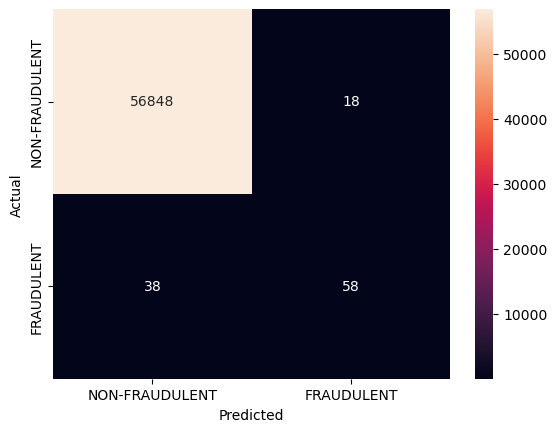

In [64]:
confusion(y_test, y_test_predicted)

<h3>Random Over_Sampling</h3>

However, in the df dataset, there is an unbalance in the distribution of fraudulent transactions and non-fraudulent transactions.
In order to check the accuracy of our machine learning model fairly, we should resample the dataset.

In [87]:
df_0 = df[df['Class'] == 0].sample(n = 284315, random_state = 99, replace = True)
df_1 = df[df['Class'] == 1].sample(n = 284315, random_state = 99, replace = True)

print(df_0.shape)
print(df_1.shape)

(284315, 31)
(284315, 31)


<h3>Train_Test Split for the resample dataset</h3>

In [88]:
df_overall = pd.concat([df_0, df_1], ignore_index=True)

In [89]:
dummy_x_sample = df_overall.drop('Class', axis=1)
y_sample = df_overall['Class']
print(dummy_x_sample.shape)
print(y_sample)

(568630, 30)
0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [90]:
x_sample = scaler.fit_transform(dummy_x_sample)
x_train_sample, x_test_sample, y_train_sample, y_test_sample = train_test_split(x_sample,y_sample, train_size=0.80, random_state=99)
print(x_train_sample.shape)
print(x_test_sample.shape)

(454904, 30)
(113726, 30)


<h3>Logistic Regression for the resample dataset</h3>

In [98]:
lr_sample = LogisticRegression()
lr_sample.fit(x_train_sample,y_train_sample)
sample_train_predicted = lr_sample.predict(x_train_sample)
sample_test_predicted = lr_sample.predict(x_test_sample)

/Users/arkdutt/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
y_train_summary_sample = classification_report(y_train_sample,sample_train_predicted)
print(y_train_summary_sample)
y_test_summary_sample = classification_report(y_test_sample,sample_test_predicted)
print(y_test_summary_sample)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227817
           1       0.98      0.92      0.95    227087

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56498
           1       0.98      0.92      0.95     57228

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



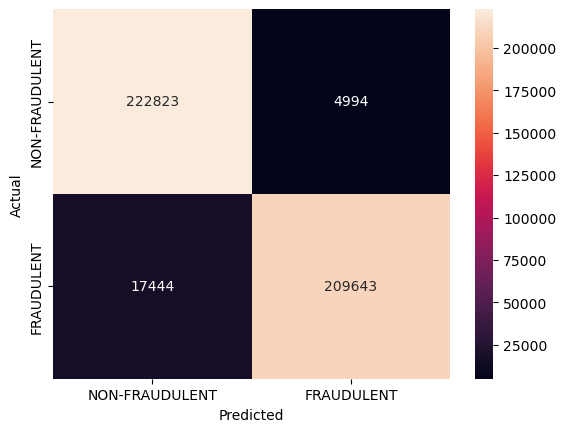

In [96]:
confusion(y_train_sample,sample_train_predicted)

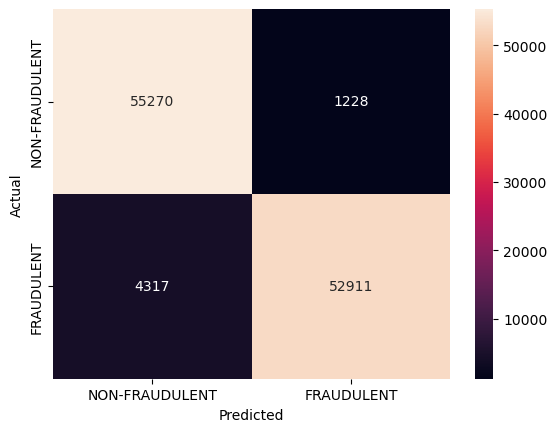

In [97]:
confusion(y_test_sample,sample_test_predicted)

<p>In conclusion, the logistic regression model achieves high precision, recall, and f-1 scores for classification models of both the classes. The precision of non-fraudulent transactions was 0.93, however, the precision of fraudulent transaction was 0.98. Moreover, the recall of non-fraudulent transactions was 0.98, however, the recall of fraudulent transactions was 0.92. This shows that the model is able to predict both positive and negative datapoints. The F-1 scores are 0.95 for both classes showing the predictive skill of a model by elaborating on its class-wise performance. It also suggest that there is a good balance between precision and recall metrics of the model.</p>